In [1]:
import numpy as np
from random import randint
import matplotlib.pyplot as plt

In [2]:
class Hopfield():

    def __init__(self,x,W,iters):
        self.x = self.signum(x) #initial assignment of nodes to set S
        self.W = self.create_W(W) #W is the weight associated with edges
        self.iters = iters

    def create_W(self,W):
      n = W.shape[0]
      W_hat = np.copy(W)
      for i  in range(n):
        for j in range(n):
          if(i!=j):
            W_hat[i][j] = -W[i][j]
          elif(i==j):
            W_hat[i][j] = 0
      #W_hat = W_hat/2
      return W_hat            

    def predict(self):
        error_lst = []
        n = self.x.shape[0]
        print(n)
        for i in range(self.iters):
          err = self.error()
          error_lst.append(err)
          update = randint(0,n-1)
          #x[update] = self.cons_noise(np.matmul(np.transpose(self.x),self.W[:,update]))
          self.x[update] = self.update_hysteritic(update,i)
          # print(self.x[update])
          #x[update] = self.linear_noise(np.matmul(np.transpose(self.x),self.W[:,update]),i)
          #x[update] = self.exp_noise(np.matmul(np.transpose(self.x),self.W[:,update]),i)
          #x[update] = self.no_noise(np.matmul(np.transpose(self.x),self.W[:,update]))
          
          #print(x)

        return self.x, error_lst

    def error(self):
      error = np.dot(np.dot(np.transpose(self.x),self.W),self.x)
      [err] = error 
      return -err/2

    def update_hysteritic(self,index,i):
      theta = 0
      w = -5*(1-i/self.iters)*(1-i/self.iters)
      #print(w)
      threshold = theta - w*self.x[index]
      u = np.matmul(np.transpose(self.x),self.W[:,index])
      # print(threshold, u, end=" ")
      if(u>=threshold):
        return 1
      return 0

    def signum(self,x):
        for i in range(x.shape[0]):
            if x[i] > 0:
                x[i] = 1
            elif x[i] <=0:
                x[i] = 0
        return x


60


array([0.])

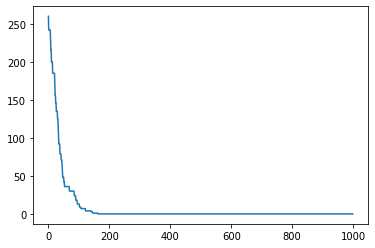

In [5]:
x = np.random.randint(2,size=(60,1))
n = x.size
x = x.reshape((x.size,1))
np.random.seed(0)
#print(x)
W = np.random.randint(2,size=(n,n))
for i in range(W.shape[0]):
  for j in range(W.shape[0]):
    if(i==j):
      W[i][i]=0
    elif(i!=j):
      W[i][j]=W[j][i]
#print(W)
iters = 1000
hp = Hopfield(x, W, iters)
x_f,err = hp.predict()
# print(x_f)
plt.plot(err)

800
7
[[0 1 0 ... 0 0 1]
 [1 0 1 ... 0 0 0]
 [0 1 0 ... 0 1 1]
 ...
 [0 0 0 ... 0 1 1]
 [0 0 1 ... 1 0 0]
 [1 0 1 ... 1 0 0]]
[0.]


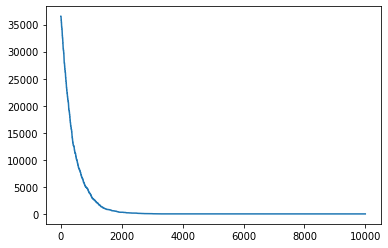

In [8]:
x = np.random.randint(2,size=(800,1))
n = x.size
x = x.reshape((x.size,1))
np.random.seed(0)
#print(x)
W = np.random.randint(2,size=(n,n))
for i in range(W.shape[0]):
  for j in range(W.shape[0]):
    if(i==j):
      W[i][i]=0
    elif(i!=j):
      W[i][j]=W[j][i]  
#print(W)
iters = 10000
hp = Hopfield(x,W,iters)
x_f,err = hp.predict()
plt.plot(err)
print(x_f.sum())
print(W)

800


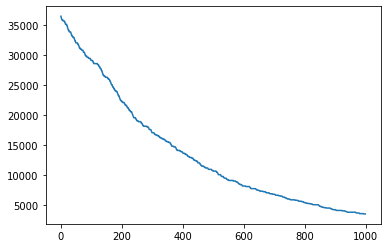

In [ ]:
x = np.random.randint(2,size=(800,1))
n = x.size
x = x.reshape((x.size,1))
np.random.seed(0)
#print(x)
W = np.random.randint(2,size=(n,n))
for i in range(W.shape[0]):
  for j in range(W.shape[0]):
    if(i==j):
      W[i][i]=-0.4
    elif(i!=j):
      W[i][j]=W[j][i]  
#print(W)
iters = 1000
hp = Hopfield(x,W,iters)
x_f,err = hp.predict()
plt.plot(err)
#print(x_f)
#print(W)

800
[76469.]


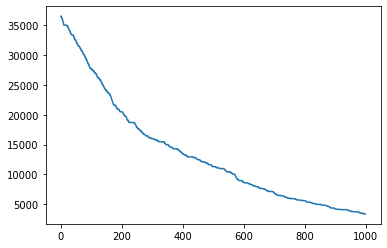

In [ ]:
x = np.random.randint(2,size=(800,1))
n = x.size
x = x.reshape((x.size,1))
np.random.seed(0)
#print(x)
W = np.random.randint(2,size=(n,n))
for i in range(W.shape[0]):
  for j in range(W.shape[0]):
    if(i==j):
      W[i][i]=-0.4
    elif(i!=j):
      W[i][j]=W[j][i]  
#print(W)
iters = 1000
hp = Hopfield(x,W,iters)
x_f,err = hp.predict()
plt.plot(err)
#print(x_f)
#print(W)
sum=0
for i in range(n):
  for j in range(n):
    if(i<j):
      sum = sum + W[i][j]

max_cut = sum/2 - err[-1]
print(max_cut)